In [1]:
import pandas as pd

data = pd.read_csv("logistic_regression_dataset.csv")
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [2]:
data['sex'] = data['sex'].map({'M': 1.0, 'F': 0.0})
data['is_smoking'] = data['is_smoking'].map({'YES': 1.0, 'NO': 0.0})

data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0.0,1.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,1.0,0.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,0.0,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,1.0,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,0.0,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,0.0,0.0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,0.0,0.0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,1.0,0.0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,0.0,0.0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [4]:
# Identify columns with missing values
columns_with_nan = data.columns[data.isnull().any()]

# Option 1: Remove rows with NaN values
cleaned_data = data.dropna()

cleaned_data.to_csv("cleaned_data.csv", index=False)

cleaned_data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1.0,0.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,0.0,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,1.0,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,0.0,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,5,61,3.0,0.0,0.0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,0.0,0.0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0.0
3385,3385,60,1.0,0.0,0.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0.0
3386,3386,46,1.0,0.0,0.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0.0
3387,3387,44,3.0,1.0,1.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1.0


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Split data into features (X) and target variable (y)
X = cleaned_data.drop('TenYearCHD', axis=1)  # Features
y = cleaned_data['TenYearCHD']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[492   4]
 [ 88   2]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       496
         1.0       0.33      0.02      0.04        90

    accuracy                           0.84       586
   macro avg       0.59      0.51      0.48       586
weighted avg       0.77      0.84      0.78       586



C:\Users\chbil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


What is AUC in ROC classification ? 

AUC ROC stands for “Area Under the Curve” of the “Receiver Operating Characteristic” curve. The AUC ROC curve is basically a way of measuring the performance of an ML model. AUC measures the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

C:\Users\chbil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC Score: 0.656160394265233


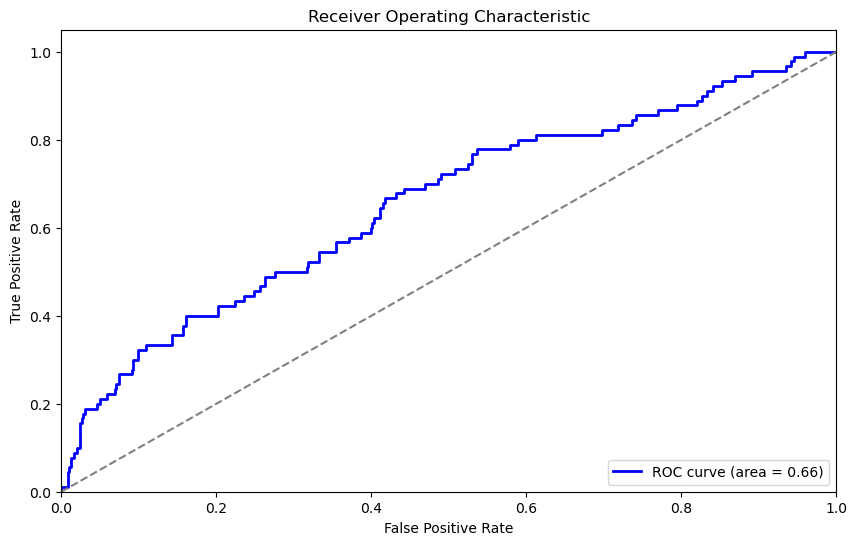

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Split data into features (X) and target variable (y)
X = cleaned_data.drop('TenYearCHD', axis=1)  # Features
y = cleaned_data['TenYearCHD']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()